# Linear classification

The goal of this exercise is to study hard and soft binary linear classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hard linear classification: perceptron algorithm

### Linearly separable data

We start by generating a binary linear classification dataset with 100 examples (50 in each class). You do not need to read the code generating the data, we just randomly select 100 point in $[0, 1]^2$ and assign a label depending on their position.

In [2]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    
    X = rng.uniform(0.0, 1.0, (n_samples, 2))
    
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples)])
    
    return X, t

X, t = create_dataset(100)

Let's visualize the training set now in the following cell. Samples of the positive class (t=1) will be represented by blue points, examples of the negative class (t=-1) by orange ones.

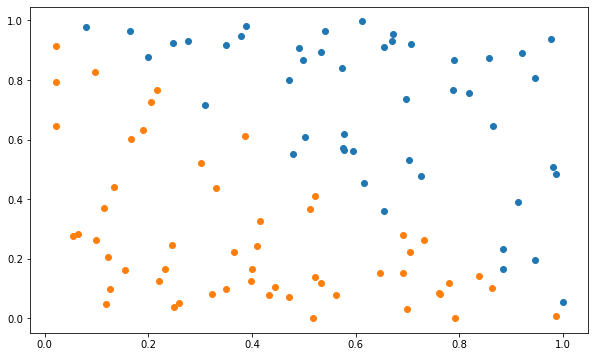

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

You will now implement the **online version of the Perceptron algorithm** to classify this data set.

As a reminder from the course, we will use an hyperplane $(\mathbf{w}, b)$ to **predict** whether an input $\mathbf{x}_i$ belongs to the positive class (+1) or negative class (-1) using the following function:

$$
    y_i =  \text{sign}( \langle \mathbf{w} . \mathbf{x}_i \rangle + b)
$$

Our goal is to minimize the **mean square error** (mse) of the hyperplane on the training set:

$$
    L(\mathbf{w}, b) = \frac{1}{N} \, \sum_{i=1}^N (t_i - y_i)^2
$$

By applying gradient descent on this loss function, we obtain the **delta learning rule**:

$$
    \Delta \mathbf{w} = \eta \, \sum_{i=1}^N (t_i - y_i) \, \mathbf{x}_i
$$

$$
    \Delta b = \eta \, \sum_{i=1}^N (t_i - y_i) 
$$

The online version of the Perceptron is given by the following algorithm:

$\text{Initialize the weight vector } \mathbf{w} \text{ and the bias } b.$

$\textbf{for } M \text{epochs:}$

$\qquad \textbf{forall } \text{examples } (\mathbf{x}_i, t_i) :$

$\qquad \qquad y_i =  \text{sign}( \langle \mathbf{w} . \mathbf{x}_i \rangle + b)$

$\qquad \qquad \mathbf{w} \gets \mathbf{w} + \eta \, (t_i - y_i) \, \mathbf{x}_i$

$\qquad \qquad b \gets b + \eta \, (t_i - y_i)$


**Q:** Implement the algorithm based on the linear regression algorithm of exercise 3. The only difference is that the weight vector is now a vector... You will need to use `np.dot`. Use 20 epochs and a learning rate of 0.01 at first, but you can vary it later. Initialize the weight vector and the bias to 0. Make a plot of the mse during training.

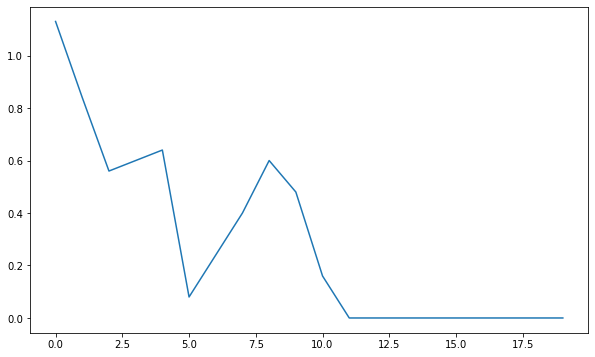

In [4]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
losses = []

for epoch in range(nb_epochs):
    loss = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        
    # Append 
    losses.append(loss/N)
    
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.show()

**Q:** Visualize the hyperplane. If we call $x_0$ and $x_1$ the two coordinates of the inputs, the equation of the hyperplane is:

$$w_0 \, x_0 + w_1 \, x_1 + b = 0$$

which takes the form:

$$x_1 = - (w_0 \, x_0 + b) / w_1$$

You just need to draw a line between the two extremities of the hyperplane, for example between 0 and 1 or between `X[:, 0].min()` and `X[:, 0].max()`.

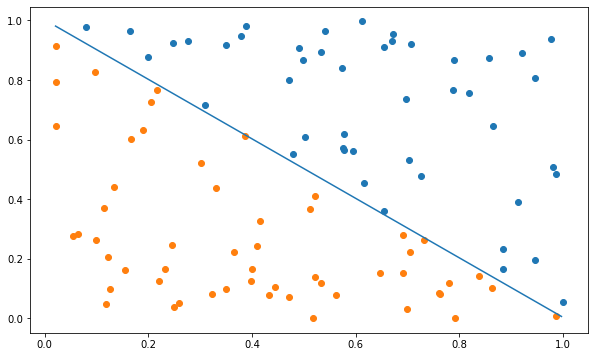

In [5]:
plt.figure(figsize=(10, 6)) 

# Data
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])

# Model
x_min, x_max = X[:, 0].min(), X[:, 0].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])

Before going further, let's track the evolution of the classification error during learning, defined as the fraction of incorrectly classified examples during one epoch:

$$
    \epsilon = \frac{\text{# misclassifications}}{N}
$$

**Q:** Modify your algorithm to compute the training error and the mse loss for each epoch. How do the training error and loss evolve during learning? Do you really need both?

*Tips:* When iterating over each training example, you will need to increment a counter for misclassifications when your prediction `y_i` is different from `t[i]` (use `!=` for "not equal"). 

Error: 0.0


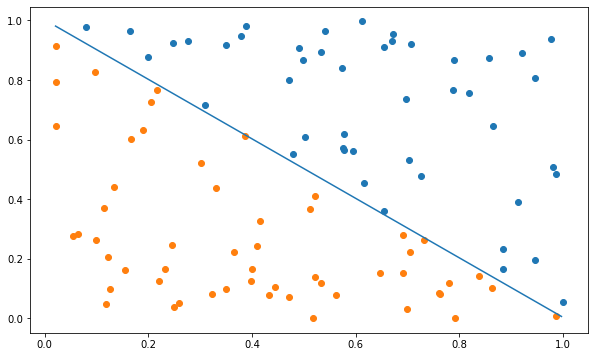

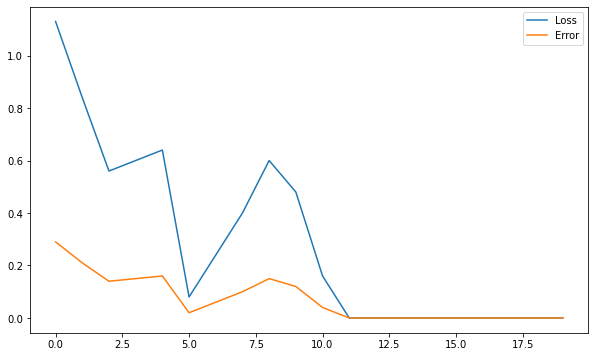

In [6]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** The training error and the loss vary together, by definition. The scale of the loss is somewhat arbitrary, while the error corresponds to what we want. If you have to choose, visualize the error.

Both go down during learning (hopefully), but there are oscillations: this is due to the online version of the Perceptron, which is not stable.

**Q:** Now is the time to play with the hyperparameters:
    
1. Vary the learning rate `eta` between extreme values (from 0.000001 to 100.0). 
2. Increase the number of epochs `nb_epochs`.

What does it change?    

Error: 0.0


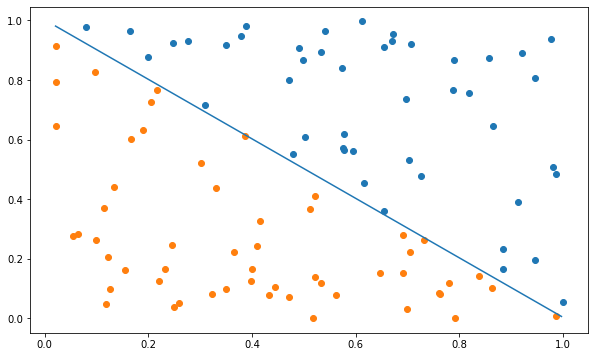

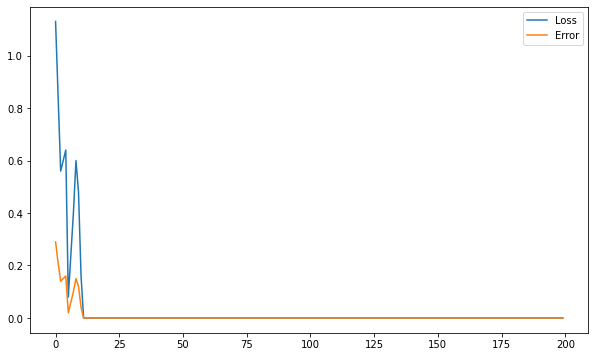

In [7]:
# Parameters
eta = 0.0001
nb_epochs = 200
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** The learning rate does not change much... We will see why in the next question.

After a minimum of epochs, the result is stable, because there are no errors anymore: $t_i - y_i$ is always 0, so the weight vector and the bias are not changed anymore.

**Q:** Change the initial value of the weight vector $\mathbf{w}$ to something different from 0 (e.g. [1, -1], [-5, 5], etc). What does it change? Vary the learning rate again and conclude on the importance of weight initialization.

Error: 0.28


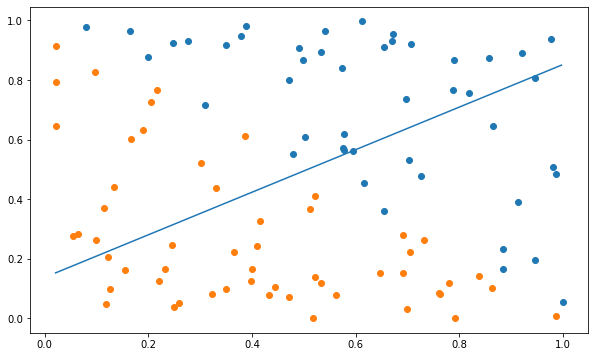

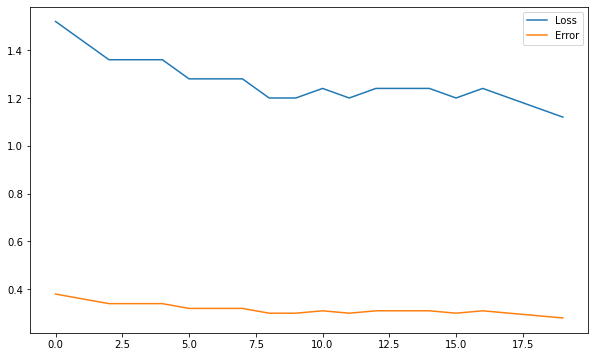

In [8]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.array([-10., 10.])
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** contrary to the case where the weight vector is initially 0, the learning rate had a big influence on the learning speed when the initial weight vector is non-zero. It is even worse with big weights ([-10, 10]).

The explanation lies on the incremental nature of the perceptron learning rule:

$$
    \mathbf{w} \leftarrow \mathbf{w} + \eta \, (t - y) \, \mathbf{x}
$$

If $\mathbf{w}$ is initially small, the first couple of errors will bring $\mathbf{w}$ in the right direction very fast. As its norm does not matter for the classification, only the bias will have to grow incrementally.

If $\mathbf{w}$ is initially big, you will need a lot of iterations to bring it in the right direction, as you only add small errors at each time step. The learning rate will then influence a lot the speed of convergence.

### Non-linearly separable data

The generated dataset was obviously linearly separable, because you found a linear hyperplane able to classify it... Let's now see what happens when you apply your algorithm on a non-linearly separable dataset. It is basically the same method as before, except that we add one outlier at the end.

In [9]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    X = rng.uniform(0.0, 1.0, (n_samples-1, 2))
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples-1)])
    
    # Outlier
    X = np.append(X, np.array([0.1, 0.1]).reshape((1, 2)), axis=0)
    t = np.append(t, [1])
    return X, t

X, t = create_dataset(100)

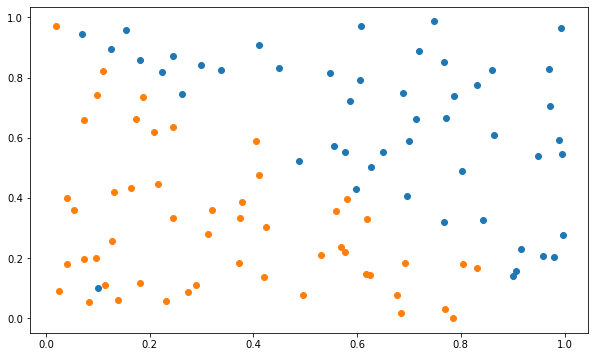

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

**Q:** Apply your online Perceptron algorithm (with default values: `eta = 0.1`, `nb_epochs = 20`,$\mathbf{w}$ and $b$ initialized to 0) to the non-linear data. At the end of learning, compute the final error on the training set. What do you observe? Is it a satisfying result? Does it get better when you change the learning rate or weight initialization?

Final error: 0.31


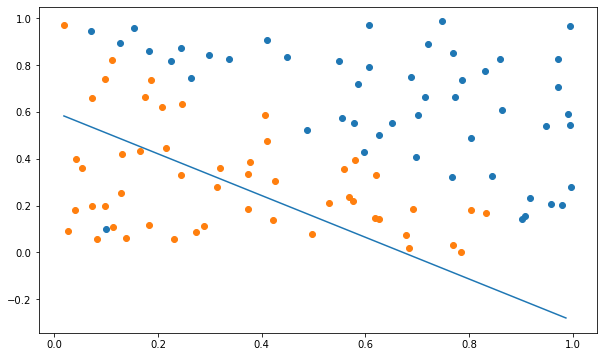

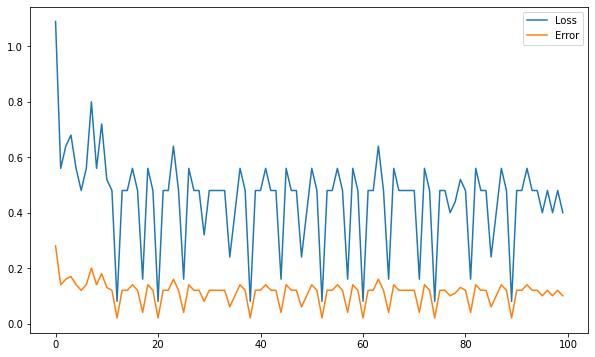

In [11]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

error = 0
for i in range(N):
    y_i = np.sign(np.dot(w, X[i, :]) + b)
    if t[i] != y_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** the outlier heavily attracts the hyperplane and changing the hyperparameters does not improve the situation. That's bad.

## Soft linear classification: logistic regression

Let's now see whether **logistic regression** helps us with outliers. The following cell implements the logistic function:

$$\sigma(x) = \dfrac{1}{1 + e^{-x}}$$

In [12]:
def logistic(x):
    return 1. / (1 + np.exp(-x))

In logistic regression, the prediction $y = \sigma(w \, x + b)$ represents the probability of belonging to the positive class. If $y>0.5$, we can say that the example belongs to the positive class.

As seen in the course, there is absolutely no difference in the learning algorithm apart from using the logistic function instead of the sign. One thing to take care of, though, is that the targets $t_i$ should be 0 and 1 in the logistic regression algorithm, while they are -1 and 1 in the current vector $\mathbf{t}$. The following cell transforms the array `t` to match the output of the logistic function.

In [13]:
t[t==-1] = 0

**Q:** Implement the logistic regression algorithm on the non-linear data. When computing the error, you will need to predict the class based on the probability $y$. What do you observe? Conclude.

Final error: 0.06


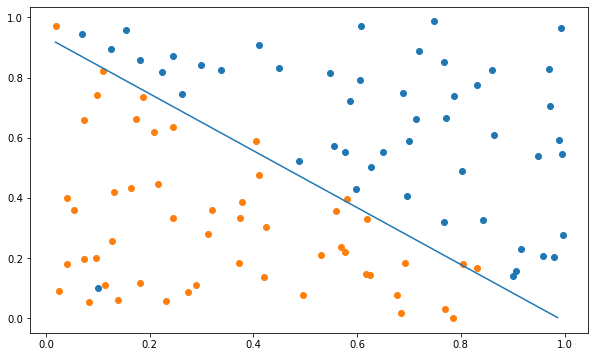

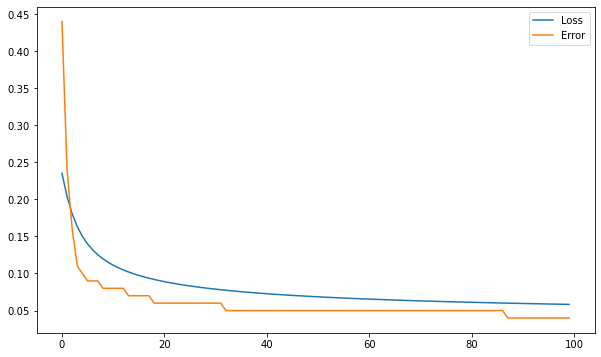

In [14]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Probability
        y_i = logistic(np.dot(w, X[i, :]) + b)
        
        # Predicted class
        c_i = 1.0 if y_i > 0.5 else 0.0
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != c_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

error = 0
for i in range(N):
    y_i = logistic(np.dot(w, X[i, :]) + b)
    c_i = 1.0 if y_i > 0.5 else 0.0
    if t[i] != c_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==0, 0], X[t==0, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

**A:** As logistic regression does not use "hard" boundaries like the perceptron, but soft ones, it is much more robust to outliers. As we have in addition the confidence score, the conclusion is that one should never use the perceptron algorithm but logistic regression for binary classification.